# Ames Housing Sale Predictions - Preprocessing & Feature Engineering

## Contents:
- [Imports & Data](#Imports-\&-Data)
- [Review Categorical Features](#Review-Categorical-Features)
- [Dummy Features](#Dummy-Features)
- [Ordinal Features](#Ordinal-Features)
- [Review New Ordinal & Dummy Features](#Review-New-Ordinal-\&-Dummy-Features)
- [Engineer New Features](#Engineer-New-Features)
- [Polynomial Features](#Polynomial-Features)
- [Final Checks & Review](#Final-Checks-\&-Review)
- [Save Clean Data](#Save-Clean-Data)

## Imports & Data

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

#### Read In Data

In [2]:
# define paths
path_cleaned_data = '../datasets/02_cleaned/'
path_production_data = '../datasets/03_production/'

In [3]:
# Read in data
# Maintaining default 'NA' instead of NaNs: (https://stackoverflow.com/a/33952294)
df_train = pd.read_csv(f'{path_cleaned_data}train_clean.csv', keep_default_na=False)
df_test = pd.read_csv(f'{path_cleaned_data}test_clean.csv', keep_default_na=False)

### Review Data
- Ensure data was loaded in properly

In [4]:
print(df_train.shape)
df_train.head()

(2048, 78)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,0,0,0,0,NA,0,3,2010,WD,138500


In [5]:
print(df_test.shape)
df_test.head()

(878, 77)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,...,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,...,24,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,...,0,184,0,0,0,NA,0,7,2007,WD
4,625,535105100,20,RL,0.0,9500,Pave,IR1,Lvl,AllPub,...,76,0,0,185,0,NA,0,7,2009,WD


### Review Updated Correlations
- Correlations have been updated post-data cleaning.

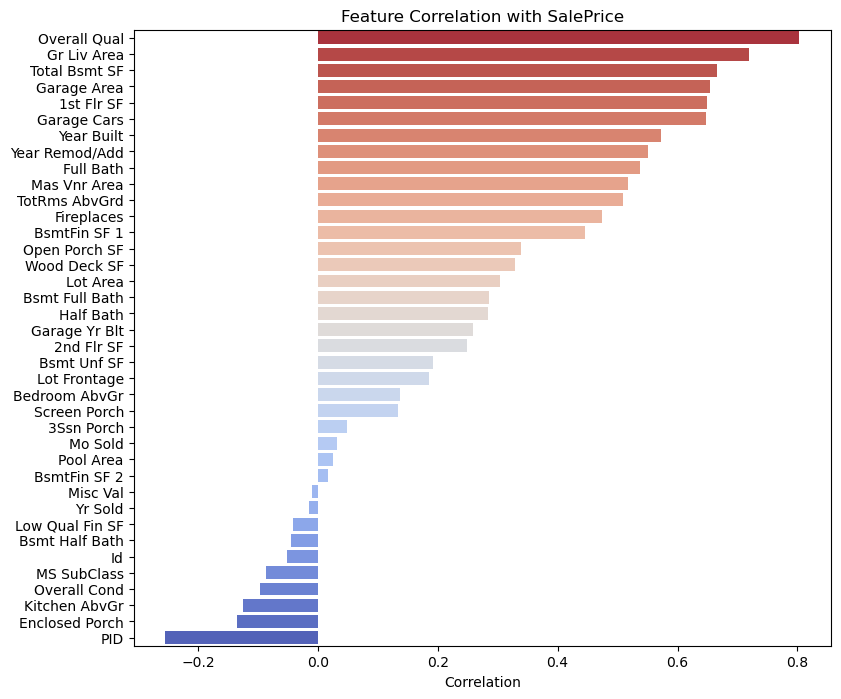

In [6]:
# Correlation
sale_price_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False) # update corerlation

# reversed color palette code modified from: https://www.reddit.com/r/learnpython/comments/lvvp8u/comment/gpe6lla/?utm_source=share&utm_medium=web2x&context=3
palette_reverse = sns.color_palette('coolwarm',n_colors=sale_price_corr.shape[0]-1)
palette_reverse.reverse()

# Plot (bar plot code modified from: https://www.geeksforgeeks.org/barplot-using-seaborn-in-python/)
plt.figure(figsize=(9,8))
sns.barplot(x=sale_price_corr['SalePrice'][1:].values,
            y=sale_price_corr['SalePrice'][1:].index,
            palette=palette_reverse);

# label
plt.title('Feature Correlation with SalePrice')
plt.xlabel('Correlation');

## Review Categorical Features
- Determine which features should be converted into dummies (nominal) and which should be converted to a numeric scale (ordinal)

In [7]:
# Review non-numeric columns to transform or create dummies
df_train.loc[:, df_train.dtypes == 'object'].columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence', 'Sale Type'],
      dtype='object')

**Nominal Features:**
- MS Zoning
- Lot Shape
- Land Contour
- Lot Config
- Neighborhood
- Condition 1
- Bldg Type
- House Style
- Roof Style
- Exterior 1st
- Exterior 2nd
- Mas Vnr Type
- Foundation
- Central Air
- Garage Type

**Unused Nominal Features:**
- Street (does not have sufficient diversity)
- Land Slope (does not have sufficient diversity)
- Condition 2 (does not have sufficient diversity)
- Roof Matl (does not have sufficient diversity)
- Heating (does not have sufficient diversity)

**Ordinal Features:**
- Exter Qual
- Exter Cond
- Bsmt Qual
- Bsmt Cond
- Bsmt Exposure
- BsmtFin Type 1
- BsmtFin Type 2
- Heating QC
- Electrical
- Kitchen Qual
- FireplaceQu
- Garage Finish
- Paved Drive
- Fence

**Unused Ordinal Features:**
- Utilities - Don't use (does not have sufficient diversity)
- Functional - Don't use (does not have sufficient diversity)
- Garage Qual - Don't use (does not have sufficient diversity)
- Garage Cond - Don't use (does not have sufficient diversity)

### Drop Unused Categorical Features

In [8]:
# Drop features without sufficient diversity
col_to_drop = ['Street',
               'Land Slope',
               'Condition 2',
               'Roof Matl',
               'Heating',
               'Utilities',
               'Functional',
               'Garage Qual',
               'Garage Cond']
df_train = df_train.drop(columns=col_to_drop)
df_test = df_test.drop(columns=col_to_drop)

## Dummy Features
- Convert Nominal Categorical Features to Dummies

In [10]:
# Create dummies for MS Zoning
# NOTE: 'Misc' feature engineered by grouping non-residential/non-commercial units
dum_ms_zoning_train = pd.get_dummies(columns=['MS Zoning'], data=df_train['MS Zoning'], prefix='MS_Zone', drop_first=True)
dum_ms_zoning_test = pd.get_dummies(columns=['MS Zoning'], data=df_test['MS Zoning'], prefix='MS_Zone', drop_first=True)

# Create dummies for Lot Shape
dum_lot_shape_train = pd.get_dummies(columns=['Lot Shape'], data=df_train['Lot Shape'], prefix='Lot_Shape', drop_first=True)
dum_lot_shape_test = pd.get_dummies(columns=['Lot Shape'], data=df_test['Lot Shape'], prefix='Lot_Shape', drop_first=True)

# Create dummies for Land Contour
dum_land_contour_train = pd.get_dummies(columns=['Land Contour'], data=df_train['Land Contour'], prefix='Land_Cont', drop_first=True)
dum_land_contour_test = pd.get_dummies(columns=['Land Contour'], data=df_test['Land Contour'], prefix='Land_Cont', drop_first=True)

# Create dummies for Lot Config
dum_lot_config_train = pd.get_dummies(columns=['Lot Config'], data=df_train['Lot Config'], prefix='Lot_Config', drop_first=True)
dum_lot_config_test = pd.get_dummies(columns=['Lot Config'], data=df_test['Lot Config'], prefix='Lot_Config', drop_first=True)

# Create dummies for Neighborhood
# Note: Neighborhoods not found in both sets: 'GrnHill', 'Landmrk'. Grouped in data cleaning stage.
dum_neighborhood_train = pd.get_dummies(columns=['Neighborhood'], data=df_train['Neighborhood'], prefix='NH', drop_first=True)
dum_neighborhood_test = pd.get_dummies(columns=['Neighborhood'], data=df_test['Neighborhood'], prefix='NH', drop_first=True)

# Create dummies for Condition 1
dum_condition_1_train = pd.get_dummies(columns=['Condition 1'], data=df_train['Condition 1'], prefix='Cond_1', drop_first=True)
dum_condition_1_test = pd.get_dummies(columns=['Condition 1'], data=df_test['Condition 1'], prefix='Cond_1', drop_first=True)

# Create dummies for Bldg Type
dum_bldg_type_train = pd.get_dummies(columns=['Bldg Type'], data=df_train['Bldg Type'], prefix='Bldg_Type', drop_first=True)
dum_bldg_type_test = pd.get_dummies(columns=['Bldg Type'], data=df_test['Bldg Type'], prefix='Bldg_Type', drop_first=True)

# Create dummies for House Style
dum_house_style_train = pd.get_dummies(columns=['House Style'], data=df_train['House Style'], prefix='House_Style', drop_first=True)
dum_house_style_test = pd.get_dummies(columns=['House Style'], data=df_test['House Style'], prefix='House_Style', drop_first=True)

# Create dummies for Roof Style
dum_roof_style_train = pd.get_dummies(columns=['Roof Style'], data=df_train['Roof Style'], prefix='Roof_Style', drop_first=True)
dum_roof_style_test = pd.get_dummies(columns=['Roof Style'], data=df_test['Roof Style'], prefix='Roof_Style', drop_first=True)

# Create dummies for Exterior 1st
# NOTE: 'Misc' feature engineered by grouping less-common exterior finishes
dum_ext_1_train = pd.get_dummies(columns=['Exterior 1st'], data=df_train['Exterior 1st'], prefix='Ext_1', drop_first=True)
dum_ext_1_test = pd.get_dummies(columns=['Exterior 1st'], data=df_test['Exterior 1st'], prefix='Ext_1', drop_first=True)

# Create dummies for Exterior 2nd
dum_ext_2_train = pd.get_dummies(columns=['Exterior 2nd'], data=df_train['Exterior 2nd'], prefix='Ext_2', drop_first=True)
dum_ext_2_test = pd.get_dummies(columns=['Exterior 2nd'], data=df_test['Exterior 2nd'], prefix='Ext_2', drop_first=True)

# Create dummies for Mas Vnr Type
dum_mas_vnr_type_train = pd.get_dummies(columns=['Mas Vnr Type'], data=df_train['Mas Vnr Type'], prefix='Mas_Vnr', drop_first=True)
dum_mas_vnr_type_test = pd.get_dummies(columns=['Mas Vnr Type'], data=df_test['Mas Vnr Type'], prefix='Mas_Vnr', drop_first=True)

# Create dummies for Foundation
dum_foundation_train = pd.get_dummies(columns=['Foundation'], data=df_train['Foundation'], prefix='Foundation', drop_first=True)
dum_foundation_test = pd.get_dummies(columns=['Foundation'], data=df_test['Foundation'], prefix='Foundation', drop_first=True)

# Create dummies for Central Air
dum_central_air_train = pd.get_dummies(columns=['Central Air'], data=df_train['Central Air'], prefix='Central_Air', drop_first=True)
dum_central_air_test = pd.get_dummies(columns=['Central Air'], data=df_test['Central Air'], prefix='Central_Air', drop_first=True)

# Create dummies for Garage Type
dum_garage_type_train = pd.get_dummies(columns=['Garage Type'], data=df_train['Garage Type'], prefix='Garage_Type', drop_first=True)
dum_garage_type_test = pd.get_dummies(columns=['Garage Type'], data=df_test['Garage Type'], prefix='Garage_Type', drop_first=True)

In [11]:
# Create Dummies Matrix
dum_to_join_train = [dum_ms_zoning_train,
                   dum_lot_shape_train,
                   dum_land_contour_train,
                   dum_lot_config_train,
                   dum_neighborhood_train,
                   dum_condition_1_train,
                   dum_bldg_type_train,
                   dum_house_style_train,
                   dum_roof_style_train,
                   dum_ext_1_train,
                   dum_ext_2_train,
                   dum_mas_vnr_type_train,
                   dum_foundation_train,
                   dum_central_air_train,
                   dum_garage_type_train]

dum_to_join_test = [dum_ms_zoning_test,
                   dum_lot_shape_test,
                   dum_land_contour_test,
                   dum_lot_config_test,
                   dum_neighborhood_test,
                   dum_condition_1_test,
                   dum_bldg_type_test,
                   dum_house_style_test,
                   dum_roof_style_test,
                   dum_ext_1_test,
                   dum_ext_2_test,
                   dum_mas_vnr_type_test,
                   dum_foundation_test,
                   dum_central_air_test,
                   dum_garage_type_test]

df_train = df_train.join(dum_to_join_train)
df_test = df_test.join(dum_to_join_test)

### Review Appended Train & Test DataFrames

In [12]:
print(df_train.shape)
df_train.head()

(2048, 167)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central_Air_Y,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,109,533352170,60,RL,0.0,13517,IR1,Lvl,CulDSac,Sawyer,...,0,0,0,1,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,CulDSac,SawyerW,...,0,0,0,1,1,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,Inside,NAmes,...,0,0,0,1,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,Reg,Lvl,Inside,Timber,...,0,0,0,1,0,0,1,0,0,0
4,255,906425045,50,RL,82.0,14235,IR1,Lvl,Inside,SawyerW,...,0,0,0,1,0,0,0,0,1,0


In [13]:
print(df_test.shape)
df_test.head()

(878, 166)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,Central_Air_Y,Garage_Type_Attchd,Garage_Type_Basment,Garage_Type_BuiltIn,Garage_Type_CarPort,Garage_Type_Detchd,Garage_Type_NA
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,Inside,OldTown,...,0,1,0,0,0,0,0,0,1,0
1,2718,905108090,90,RL,0.0,9662,IR1,Lvl,Inside,Sawyer,...,0,0,0,1,1,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,IR1,Lvl,Inside,Gilbert,...,0,0,0,1,1,0,0,0,0,0
3,1989,902207150,30,RM,60.0,8520,Reg,Lvl,Inside,OldTown,...,0,0,0,1,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,IR1,Lvl,Inside,NAmes,...,0,0,0,1,1,0,0,0,0,0


## Ordinal Features
- Convert Ordinal Categorical Features to Numbers

In [15]:
# Convert ordinal data to numbers
# Standard rating scale for many ordinal features in this dataset
map_rating = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

# Exter Qual
map_extr_qual = {'NA':0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
df_train['Exter Qual'] = df_train['Exter Qual'].replace(to_replace=map_extr_qual)
df_test['Exter Qual'] = df_test['Exter Qual'].replace(to_replace=map_extr_qual)

# Exter Cond
map_extr_cond = {'NA':0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
df_train['Exter Cond'] = df_train['Exter Cond'].replace(to_replace=map_extr_cond)
df_test['Exter Cond'] = df_test['Exter Cond'].replace(to_replace=map_extr_cond)

# Bsmt Qual
map_bsmt_qual = map_rating
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].replace(to_replace=map_bsmt_qual)
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].replace(to_replace=map_bsmt_qual)

# Bsmt Cond
map_bsmt_cond =  map_rating
df_train['Bsmt Cond'] = df_train['Bsmt Cond'].replace(to_replace=map_bsmt_cond)
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].replace(to_replace=map_bsmt_cond)

# Bsmt Exposure
map_bsmt_exposure =  {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
df_train['Bsmt Exposure'] = df_train['Bsmt Exposure'].replace(to_replace=map_bsmt_exposure)
df_test['Bsmt Exposure'] = df_test['Bsmt Exposure'].replace(to_replace=map_bsmt_exposure)

# BsmtFin Type 1
map_bsmt_fin_1 = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
df_train['BsmtFin Type 1'] = df_train['BsmtFin Type 1'].replace(to_replace=map_bsmt_fin_1)
df_test['BsmtFin Type 1'] = df_test['BsmtFin Type 1'].replace(to_replace=map_bsmt_fin_1)

# BsmtFin Type 2
map_bsmt_fin_2 = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
df_train['BsmtFin Type 2'] = df_train['BsmtFin Type 2'].replace(to_replace=map_bsmt_fin_2)
df_test['BsmtFin Type 2'] = df_test['BsmtFin Type 2'].replace(to_replace=map_bsmt_fin_2)

# Heating QC
map_heating_qc = map_rating
df_train['Heating QC'] = df_train['Heating QC'].replace(to_replace=map_heating_qc)
df_test['Heating QC'] = df_test['Heating QC'].replace(to_replace=map_heating_qc)

# Electrical
map_electrical = {'NA':0, 'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4} # Single calue of NA to 0 also
df_train['Electrical'] = df_train['Electrical'].replace(to_replace=map_electrical)
df_test['Electrical'] = df_test['Electrical'].replace(to_replace=map_electrical)

# Kitchen Qual
map_kitchen_qual = map_rating
df_train['Kitchen Qual'] = df_train['Kitchen Qual'].replace(to_replace=map_kitchen_qual)
df_test['Kitchen Qual'] = df_test['Kitchen Qual'].replace(to_replace=map_kitchen_qual)

# Fireplace Qu
map_fireplace_qu = map_rating
df_train['Fireplace Qu'] = df_train['Fireplace Qu'].replace(to_replace=map_fireplace_qu)
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].replace(to_replace=map_fireplace_qu)

# Garage Finish
map_garage_finish = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
df_train['Garage Finish'] = df_train['Garage Finish'].replace(to_replace=map_garage_finish)
df_test['Garage Finish'] = df_test['Garage Finish'].replace(to_replace=map_garage_finish)

# Paved Drive
map_paved_drive = {'NA':0, 'N':0, 'P':1, 'Y':2}
df_train['Paved Drive'] = df_train['Paved Drive'].replace(to_replace=map_paved_drive)
df_test['Paved Drive'] = df_test['Paved Drive'].replace(to_replace=map_paved_drive)

# Fence
map_fence = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
df_train['Fence'] = df_train['Fence'].replace(to_replace=map_fence)
df_test['Fence'] = df_test['Fence'].replace(to_replace=map_fence)

In [16]:
# Confirm columns adjusted appropriately for both train and test
(df_train.loc[:, df_train.dtypes == 'object'].columns != df_test.loc[:, df_test.dtypes == 'object'].columns).sum()

0

### Plot Ordinal Features

<Figure size 640x480 with 0 Axes>

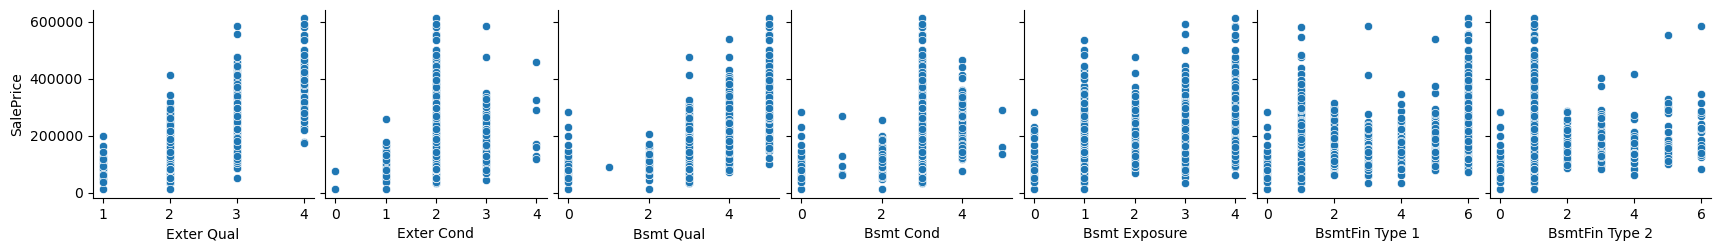

In [17]:
plt.figure()
sns.pairplot(df_train,
             x_vars = ['Exter Qual',
                       'Exter Cond',
                       'Bsmt Qual',
                       'Bsmt Cond',
                       'Bsmt Exposure',
                       'BsmtFin Type 1',
                       'BsmtFin Type 2'],
             y_vars=['SalePrice']);

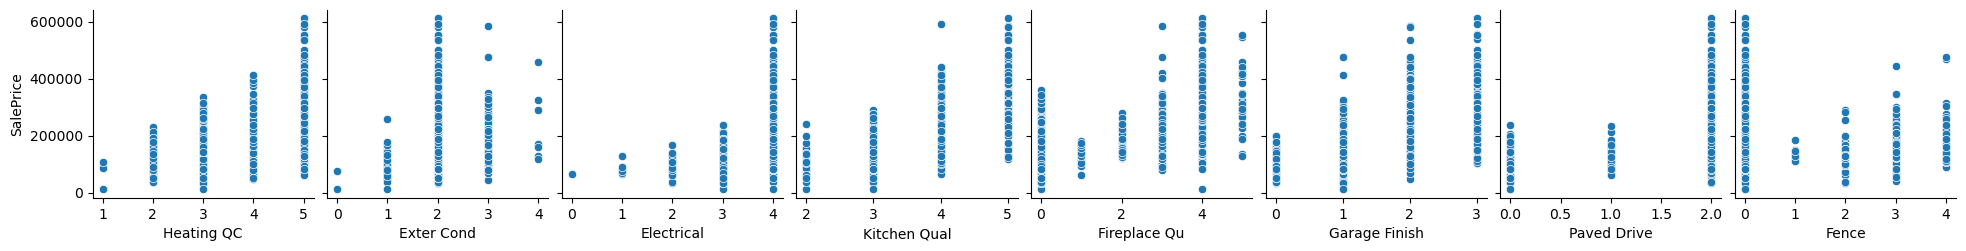

In [18]:
sns.pairplot(df_train,
             x_vars = ['Heating QC',
                       'Exter Cond',
                       'Electrical',
                       'Kitchen Qual',
                       'Fireplace Qu',
                       'Garage Finish',
                       'Paved Drive',
                       'Fence'],
             y_vars=['SalePrice']);

## Review New Ordinal & Dummy Features

In [19]:
# Review new features
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Central_Air_Y', 'Garage_Type_Attchd', 'Garage_Type_Basment',
       'Garage_Type_BuiltIn', 'Garage_Type_CarPort', 'Garage_Type_Detchd',
       'Garage_Type_NA'],
      dtype='object', length=167)

In [20]:
# Calculate corerlation to SalePrice
sale_price_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

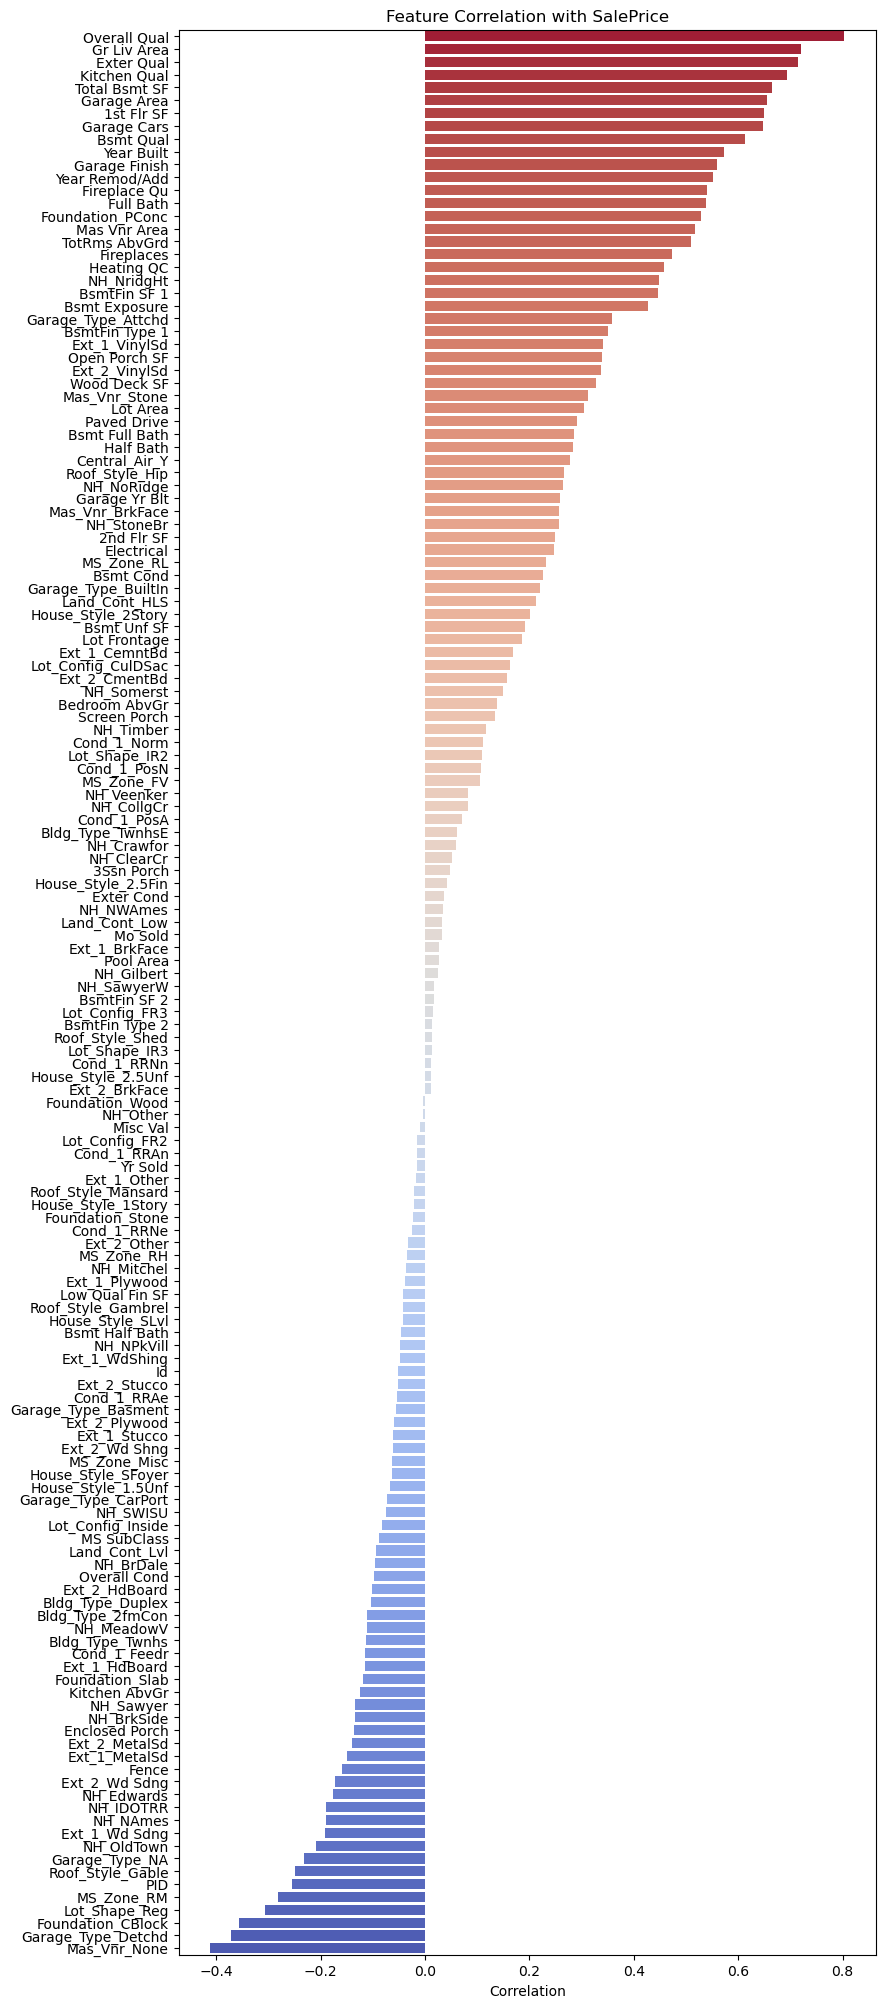

In [21]:
# Correlation
# Bar plot visualization - easier to see scale in addition to colors
sale_price_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False) # update corerlation

# reversed color palette code modified from: https://www.reddit.com/r/learnpython/comments/lvvp8u/comment/gpe6lla/?utm_source=share&utm_medium=web2x&context=3
palette_reverse = sns.color_palette('coolwarm',n_colors=sale_price_corr.shape[0]-1)
palette_reverse.reverse()

# Plot (bar plot code modified from: https://www.geeksforgeeks.org/barplot-using-seaborn-in-python/)
plt.figure(figsize=(9,25))
sns.barplot(x=sale_price_corr['SalePrice'][1:].values,
            y=sale_price_corr['SalePrice'][1:].index,
            palette=palette_reverse);

# label
plt.title('Feature Correlation with SalePrice')
plt.xlabel('Correlation');

### Drop Remaining Categorical Features
- The identified features have now all been converted to numeric data.
- The original categorical data can now be dropped.

In [22]:
# Create list of columns to be dropped
# Everything that is left as an object (i.e. not converted to ordinal numbers or dummies) should be dropped
col_to_drop = df_train.loc[:, df_train.dtypes == 'object'].columns
col_to_drop

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Central Air',
       'Garage Type', 'Sale Type'],
      dtype='object')

In [23]:
df_train = df_train.drop(labels=col_to_drop, axis=1)
df_test = df_test.drop(labels=col_to_drop, axis=1)

## Engineer New Features

### Total Bathrooms
- Create a new feature called 'Total Bathrooms' that includes all bathrooms
    - 1 per bathroom
    - 0.5 per half bathroom

In [24]:
# Total bathrooms
df_train['Total Bath'] = df_train['Full Bath'] + (0.5 * df_train['Half Bath']) + df_train['Bsmt Full Bath'] + (0.5 * df_train['Bsmt Half Bath'])
df_test['Total Bath'] = df_test['Full Bath'] + (0.5 * df_test['Half Bath']) + df_test['Bsmt Full Bath'] + (0.5 * df_test['Bsmt Half Bath'])

In [25]:
# Review new feature (Total Bath) correlation
total_bath_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
total_bath_corr.loc[total_bath_corr.index == 'Total Bath']

,SalePrice
Total Bath,0.632518


C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


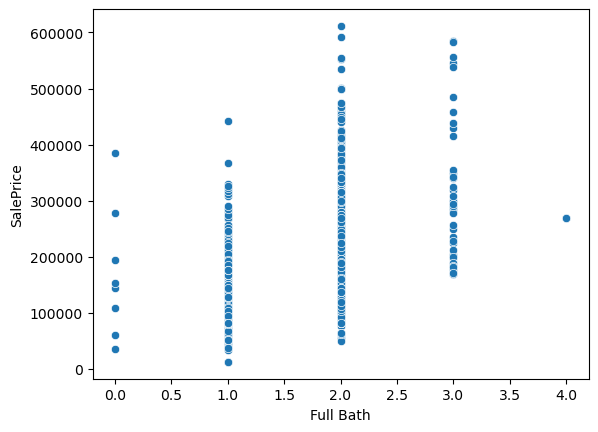

In [26]:
sns.scatterplot(df_train['Full Bath'], df_train['SalePrice']);

### Total Area

In [27]:
# Total Area
df_train['Total Area'] = df_train['Gr Liv Area'] + df_train['Total Bsmt SF']
df_test['Total Area'] = df_test['Gr Liv Area'] + df_test['Total Bsmt SF']

In [28]:
# Review new feature (Total sqft) correlation
total_area_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
total_area_corr.loc[total_area_corr.index == 'Total Area']

,SalePrice
Total Area,0.825799


C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


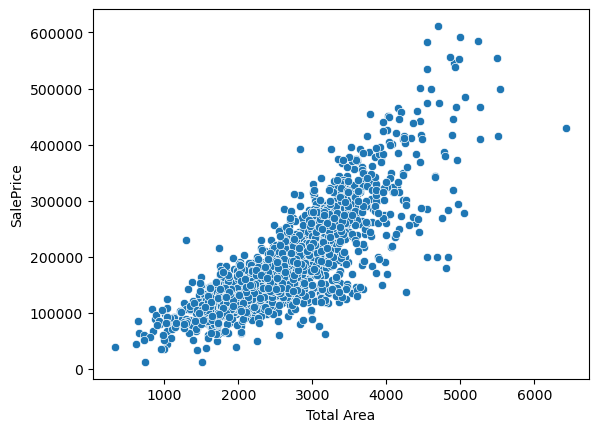

In [29]:
sns.scatterplot(df_train['Total Area'], df_train['SalePrice']);

### Total Outside Amenity Area

In [30]:
# Total Outside Area
df_train['Outside Amenity Area'] = df_train['Wood Deck SF'] + df_train['Open Porch SF'] + df_train['Enclosed Porch']\
                                 + df_train['3Ssn Porch'] + df_train['Screen Porch'] + df_train['Pool Area']

df_test['Outside Amenity Area'] = df_test['Wood Deck SF'] + df_test['Open Porch SF'] + df_test['Enclosed Porch']\
                                + df_test['3Ssn Porch'] + df_test['Screen Porch'] + df_test['Pool Area']

In [31]:
outside_area_corr = df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
outside_area_corr.loc[outside_area_corr.index == 'Outside Amenity Area']

,SalePrice
Outside Amenity Area,0.394011


C:\Users\Chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


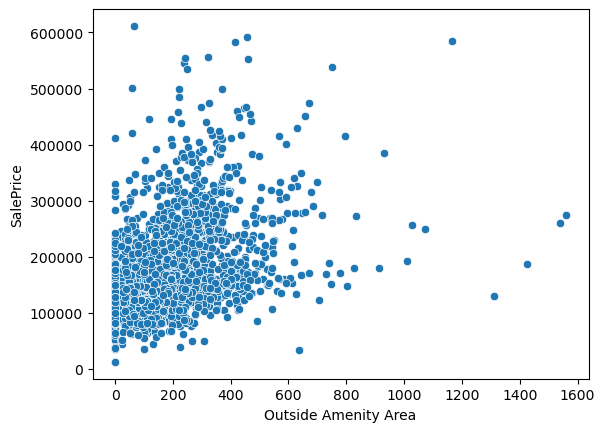

In [32]:
sns.scatterplot(df_train['Outside Amenity Area'], df_train['SalePrice']);

## Polynomial Features
1. Overall quality vs total square footage
1. Garage area vs how many cars fit within the garage
1. Exterior quality vs exterior condition
1. Basement features - basement quality, total basement area, basement condition, basement finish, basement exposure
1. Number of fireplaces vs fireplace quality
1. Masony area vs if the masonry is stone
1. Year built vs remodeled
1. Full bathrooms vs rooms above grade
1. Total quality - overall quality, exterior quality, kitchen quality, basement quality, heating quality

In [33]:
# Define which features will be used to create polynomial features
poly_overall = ['Overall Qual',
                 'Gr Liv Area']
poly_garage = ['Garage Area',
               'Garage Cars',
               'Garage Finish']
poly_ext = ['Exter Qual',
            'Exter Cond']
poly_bsmt = ['Bsmt Qual',
             'Total Bsmt SF',
             'Bsmt Cond',
             'BsmtFin SF 1',
             'Bsmt Exposure']
poly_fire = ['Fireplaces',
             'Fireplace Qu']
poly_mas = ['Mas Vnr Area',
            'Mas_Vnr_Stone']
poly_year = ['Year Built',
             'Year Remod/Add']
poly_rooms = ['Full Bath',
              'TotRms AbvGrd']
poly_total_qual = ['Overall Qual',
                   'Exter Qual',
                   'Kitchen Qual',
                   'Bsmt Qual',
                   'Heating QC']

In [34]:
# Concatenate polynomial features
poly = poly_overall + poly_garage + poly_ext + poly_bsmt + \
       poly_fire + poly_mas + poly_year + poly_rooms + ['Kitchen Qual', 'Heating QC']

In [35]:
ct = ColumnTransformer([ # (name, transformer, columns)
    ('pf_overall', PolynomialFeatures(include_bias=False), poly_overall),
    ('pf_garage', PolynomialFeatures(include_bias=False), poly_garage),
    ('pf_ext', PolynomialFeatures(include_bias=False), poly_ext),
    ('pf_bsmt', PolynomialFeatures(include_bias=False), poly_bsmt),
    ('pf_fire', PolynomialFeatures(include_bias=False), poly_fire),
    ('pf_mas', PolynomialFeatures(include_bias=False), poly_mas),
    ('pf_year', PolynomialFeatures(include_bias=False), poly_year),
    ('pf_rms', PolynomialFeatures(include_bias=False), poly_rooms),
    ('pf_total_qual', PolynomialFeatures(include_bias=False), poly_total_qual),
], remainder='passthrough', verbose_feature_names_out=True)

In [36]:
# Fit and transofrm all polynomial features via column transformer
X_poly_train = pd.DataFrame(ct.fit_transform(df_train[poly]), columns=ct.get_feature_names_out())
X_poly_test = pd.DataFrame(ct.transform(df_test[poly]), columns=ct.get_feature_names_out())

### Merge DataFrames add 'SalePrice' column back to training df

In [37]:
X_poly_train['Id'] = df_train['Id']
X_poly_test['Id'] = df_test['Id']

In [38]:
df_train = df_train.merge(right=X_poly_train, how='inner', on=['Id'])
df_test = df_test.merge(right=X_poly_test, how='inner', on=['Id'])

In [39]:
# Shift 'SalePrice' to the end of df_train - modified from (https://stackoverflow.com/a/35322540)
df_train = df_train[[col for col in df_train if col not in ['SalePrice']] + ['SalePrice']]

## Final Checks & Review

In [40]:
print(df_train.shape)
df_train.head()

(2048, 233)


,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,pf_total_qual__Exter Qual Kitchen Qual,pf_total_qual__Exter Qual Bsmt Qual,pf_total_qual__Exter Qual Heating QC,pf_total_qual__Kitchen Qual^2,pf_total_qual__Kitchen Qual Bsmt Qual,pf_total_qual__Kitchen Qual Heating QC,pf_total_qual__Bsmt Qual^2,pf_total_qual__Bsmt Qual Heating QC,pf_total_qual__Heating QC^2,SalePrice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,12.0,9.0,15.0,16.0,12.0,20.0,9.0,15.0,25.0,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,12.0,12.0,15.0,16.0,16.0,20.0,16.0,20.0,25.0,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,8.0,6.0,6.0,16.0,12.0,12.0,9.0,9.0,9.0,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,6.0,8.0,8.0,9.0,12.0,12.0,16.0,16.0,16.0,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,6.0,4.0,6.0,9.0,6.0,9.0,4.0,6.0,9.0,138500


In [41]:
print(df_test.shape)
df_test.head()

(878, 232)


,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,pf_total_qual__Exter Qual^2,pf_total_qual__Exter Qual Kitchen Qual,pf_total_qual__Exter Qual Bsmt Qual,pf_total_qual__Exter Qual Heating QC,pf_total_qual__Kitchen Qual^2,pf_total_qual__Kitchen Qual Bsmt Qual,pf_total_qual__Kitchen Qual Heating QC,pf_total_qual__Bsmt Qual^2,pf_total_qual__Bsmt Qual Heating QC,pf_total_qual__Heating QC^2
0,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,...,4.0,4.0,4.0,8.0,4.0,4.0,8.0,4.0,8.0,16.0
1,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,...,4.0,6.0,8.0,6.0,9.0,12.0,9.0,16.0,12.0,9.0
2,2414,528218130,60,58.0,17104,7,5,2006,2006,0.0,...,9.0,12.0,12.0,15.0,16.0,16.0,20.0,16.0,20.0,25.0
3,1989,902207150,30,60.0,8520,5,6,1923,2006,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,625,535105100,20,0.0,9500,6,5,1963,1963,247.0,...,4.0,6.0,8.0,8.0,9.0,12.0,12.0,16.0,16.0,16.0


In [42]:
# Check to make sure columns line up
train_cols = list(df_train.columns)
test_cols = list(df_test.columns)
test_cols.append('SalePrice')
print(train_cols == test_cols)

True


In [43]:
# Check for missing values:
print(f'Train NaNs: {df_train.isna().sum().sum()}')
print(f'Test NaNs:  {df_test.isna().sum().sum()}')

Train NaNs: 0
Test NaNs:  0


## Save Clean Data
- Save cleaned data to a csv to load into other notebooks

In [44]:
df_train.to_csv(f'{path_production_data}train_production.csv', index=False)
df_test.to_csv(f'{path_production_data}test_production.csv', index=False)